# Loading Custom Models

### Loading a Pre-trained Model from Disk

In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

Loading CIFAR-10 data

In [2]:
((trainX, trainY), (testX, testY)) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [3]:
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0

In [4]:
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [5]:
labelNames = ["airplane", "automobile", "bird", "cat", "deer",
              "dog", "frog", "horse", "ship", "truck"]

Loading pre-trained network

In [19]:
from google.colab import drive

drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [20]:
cd gdrive/My\ Drive/DL

[Errno 2] No such file or directory: 'gdrive/My Drive/DL'
/content/gdrive/My Drive/DL


In [21]:
pwd

'/content/gdrive/My Drive/DL'

In [22]:
model = load_model("convnet_weights.hdf5")

Pass a sample image to the model to perform the prediction

In [23]:
model.evaluate(testX, testY, batch_size=32, verbose=1)

313/313 [==============================] - 3s 9ms/step - loss: 1.2325 - accuracy: 0.5696


[1.232472538948059, 0.569599986076355]

Loop over the sample images

In [24]:
preds = model.predict(testX[:8], batch_size=8).argmax(axis=1)

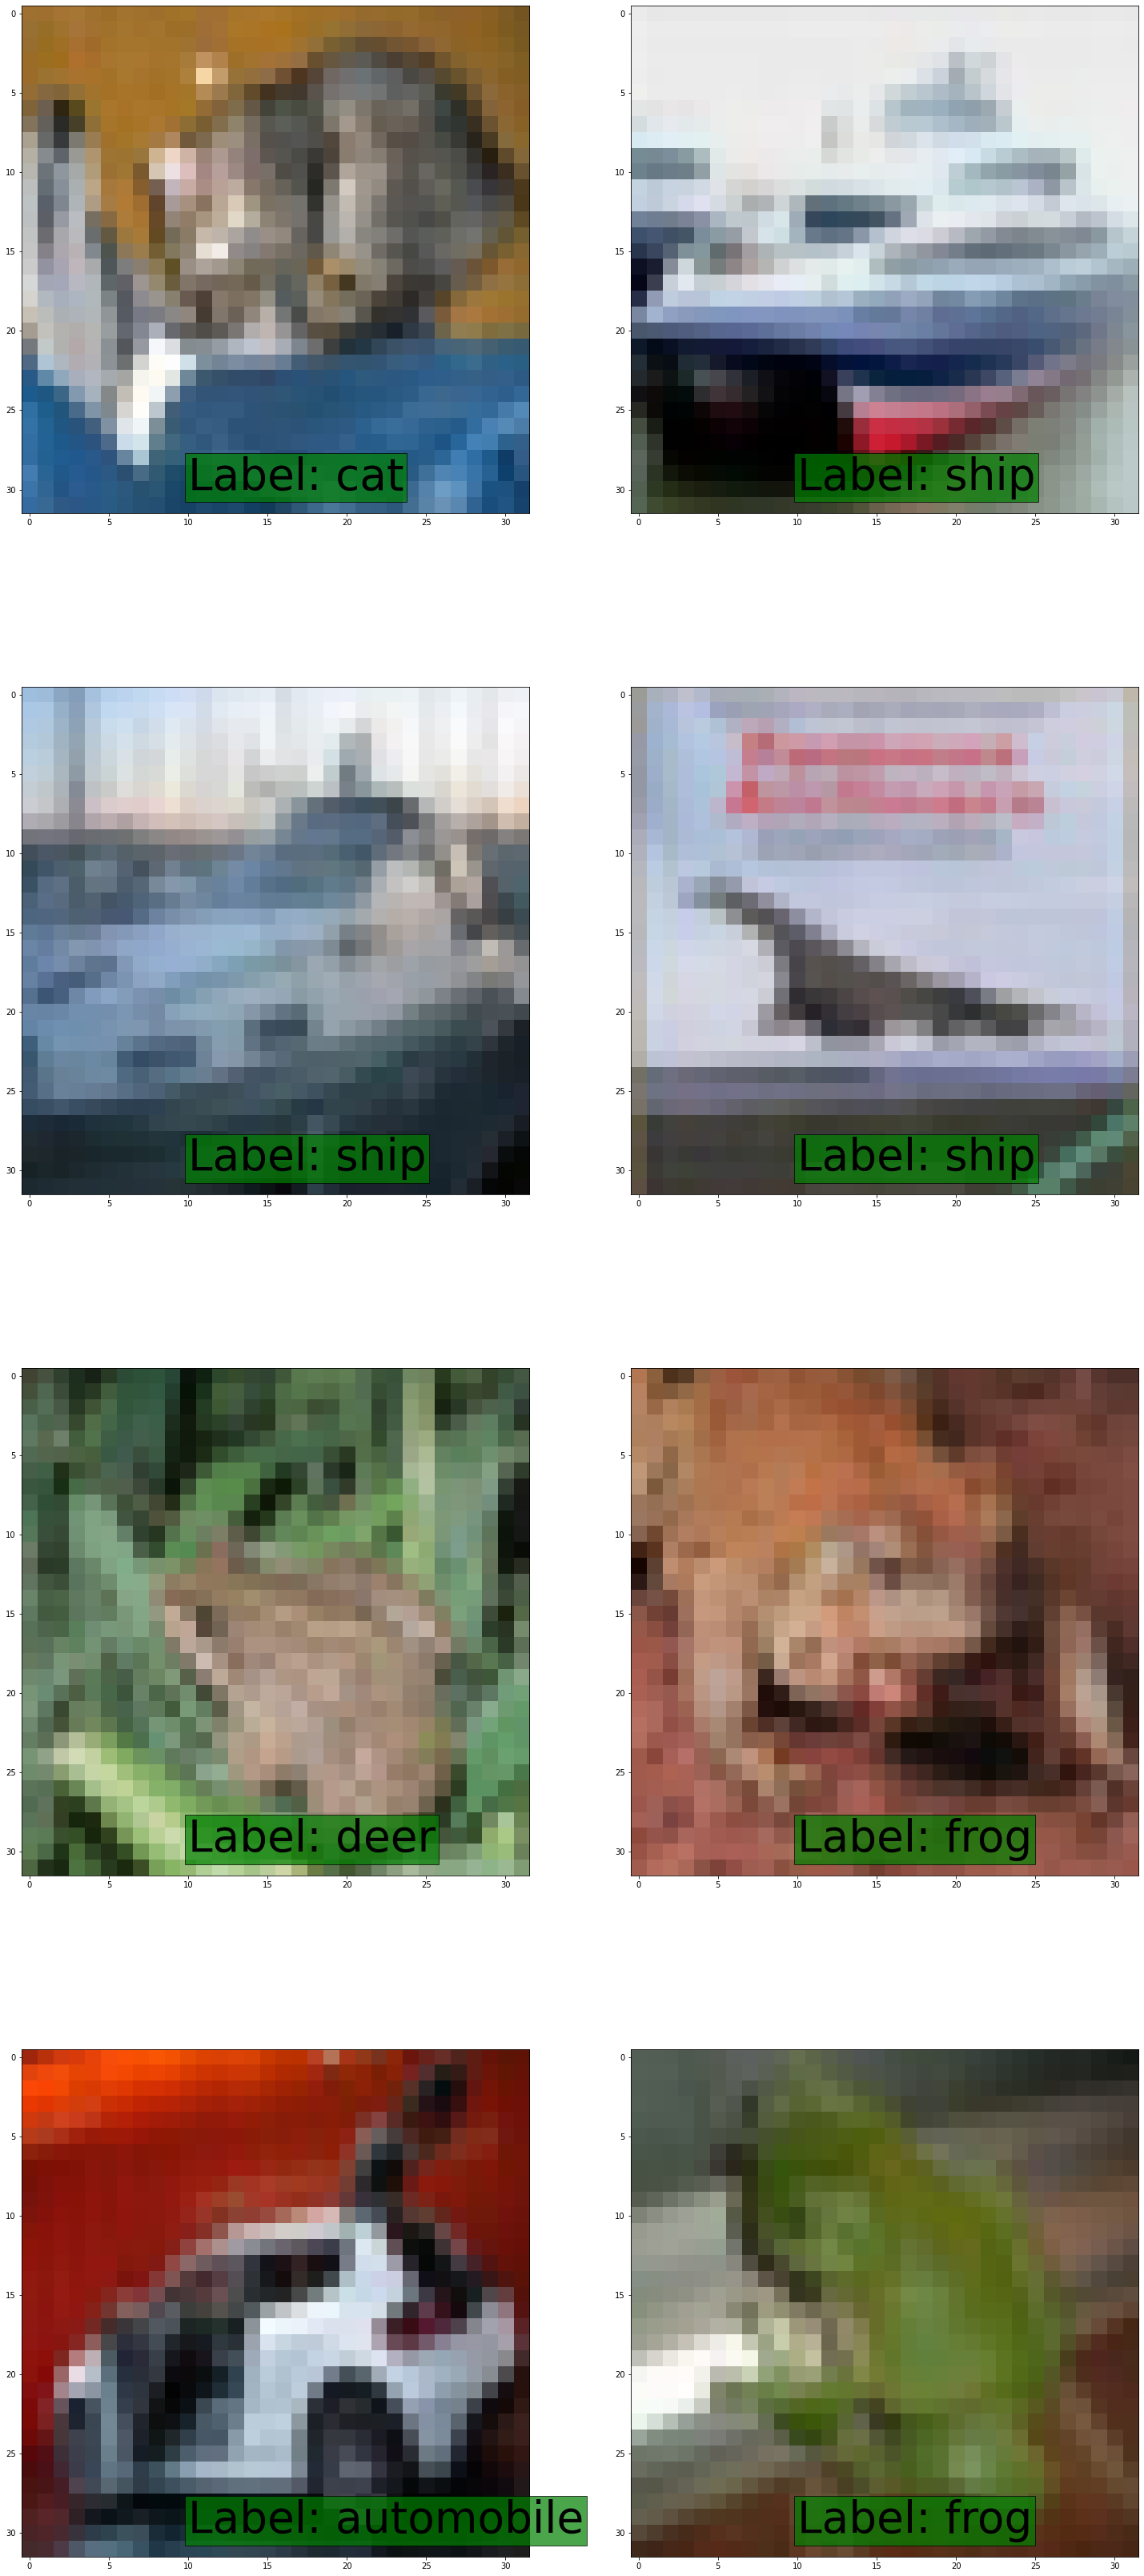

In [25]:
plt.figure(figsize=(25,60))

for (i, image) in enumerate(testX[:8]):
    plt.subplot(4, 2, i+1)
    plt.text(10, 30, "Label: {}".format(labelNames[preds[i]]), 
                 fontsize=55, bbox=dict(facecolor='green', alpha=0.7))
    
    plt.imshow(image)
    plt.grid(False)